# Model Parameters Analysis

In [4]:
import pandas as pd
from pandas.plotting import autocorrelation_plot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

plt.rcParams['figure.figsize']=[40,20]
plt.rcParams['font.size']=22
plt.rcParams['font.weight']='bold'
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24

## SARS

In [21]:
sars_7d = pd.read_csv("../results/SARS_7d_90_params.csv")
sars_14d = pd.read_csv("../results/SARS_14d_90_params.csv")
sars_21d = pd.read_csv("../results/SARS_21d_90_params.csv")
sars_117d = pd.read_csv("../results/SARS_117d_90_params.csv")

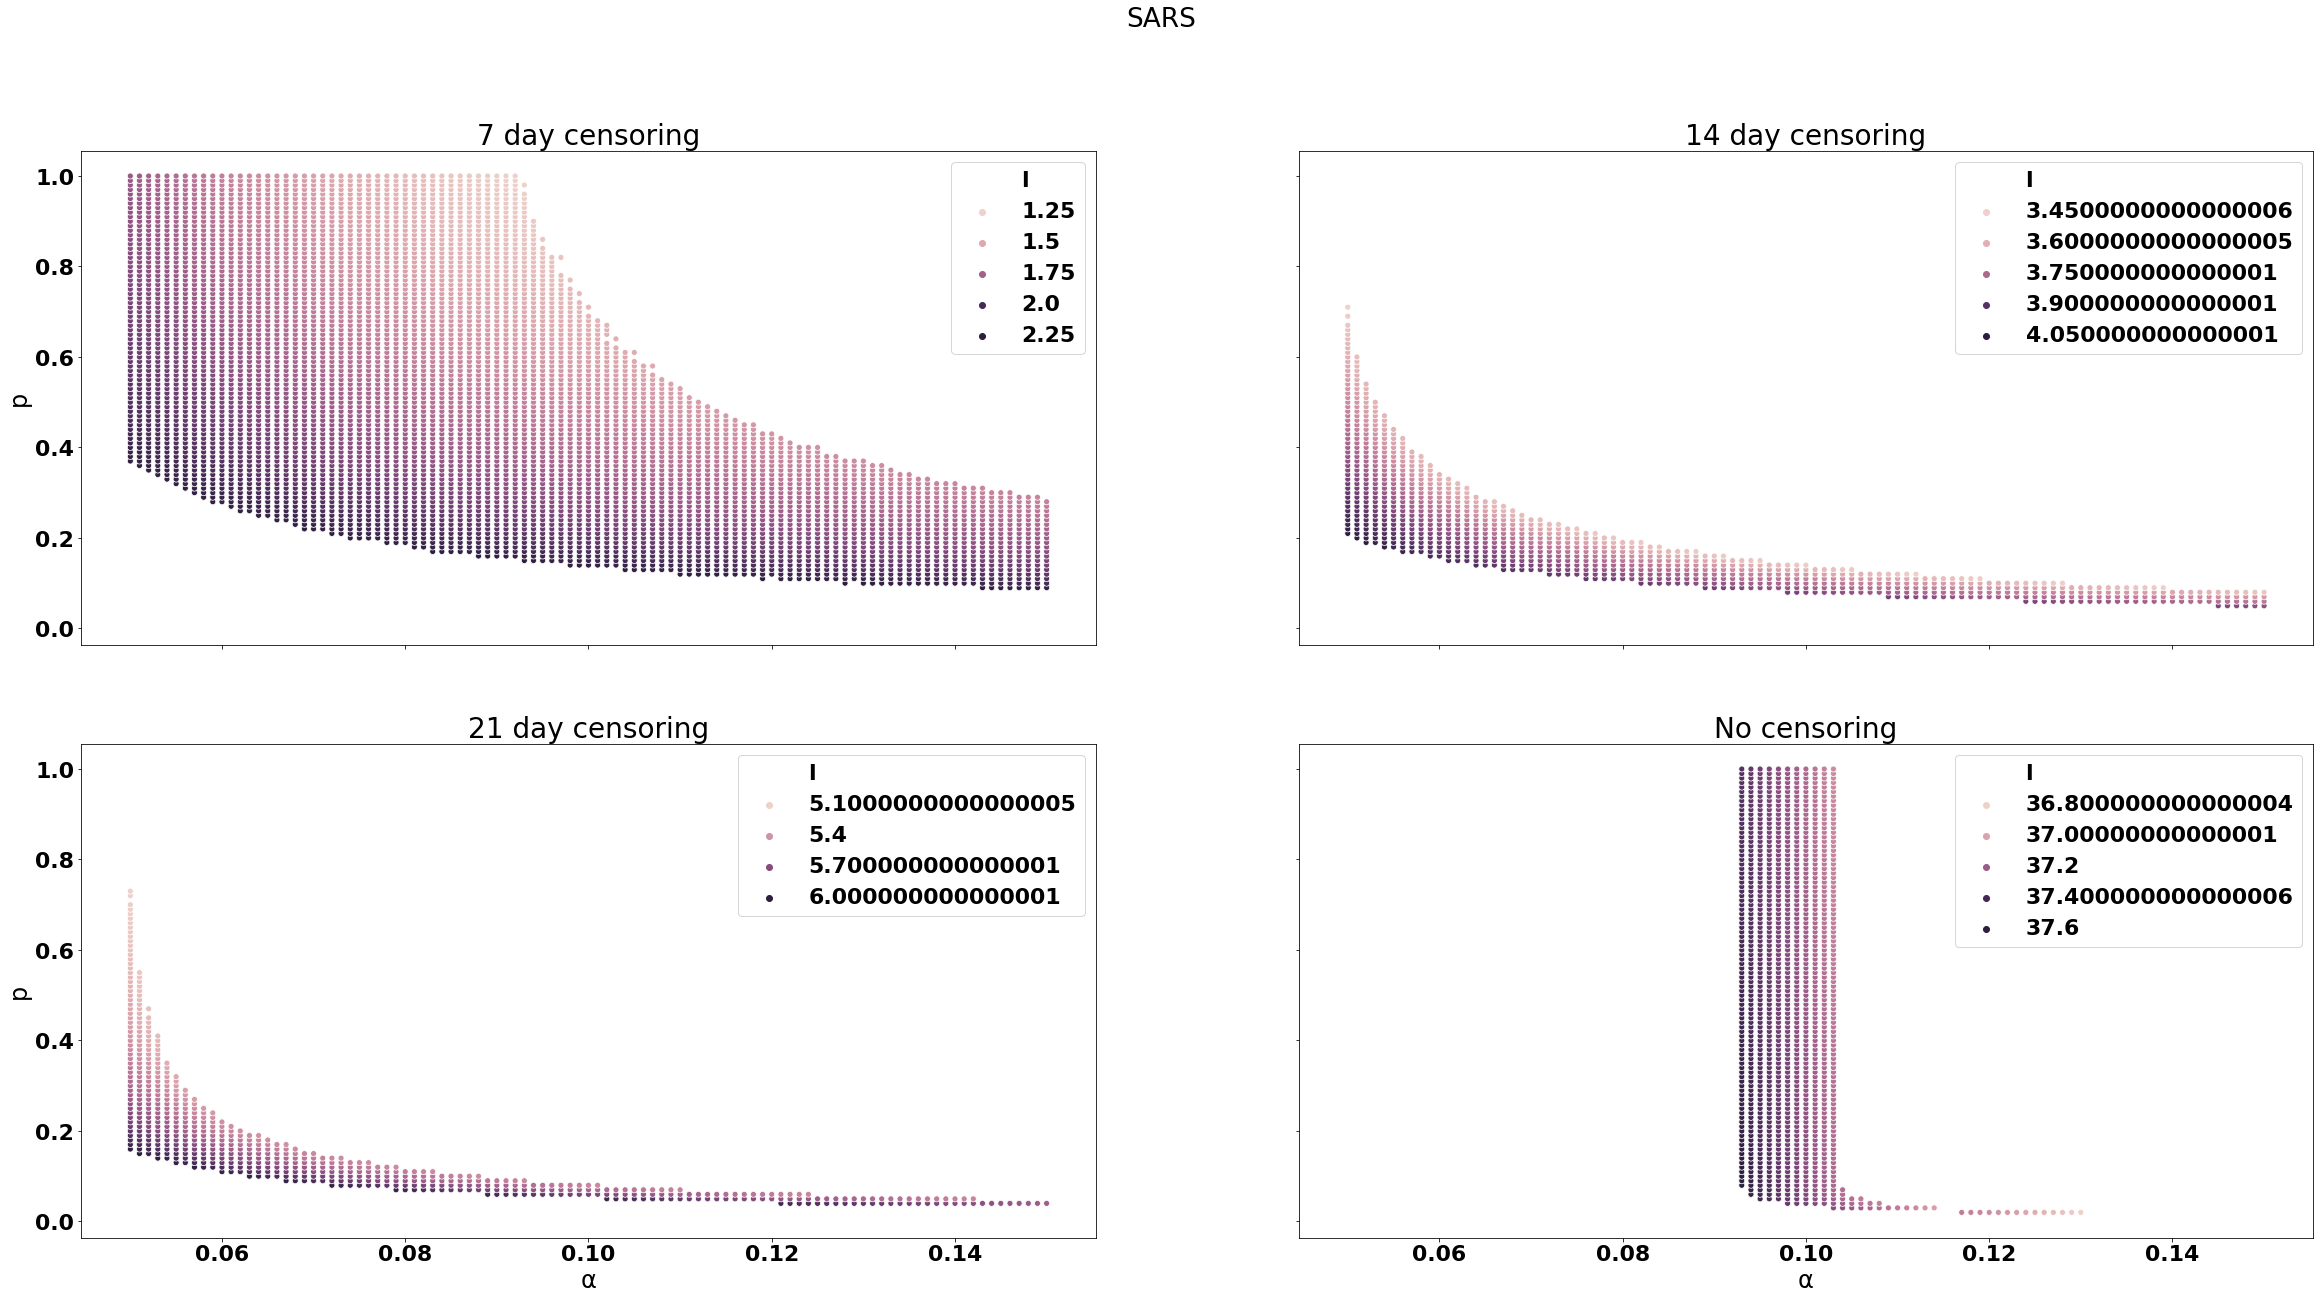

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

fig.suptitle("SARS")

ax[0][0].set_title("7 day censoring")
sns.scatterplot(x='α', y='p', hue='l', data=sars_7d, ax=ax[0][0])

ax[0][1].set_title("14 day censoring")
sns.scatterplot(x='α', y='p', hue='l', data=sars_14d, ax=ax[0][1])

ax[1][0].set_title("21 day censoring")
sns.scatterplot(x='α', y='p', hue='l', data=sars_21d, ax=ax[1][0])

ax[1][1].set_title("No censoring")
sns.scatterplot(x='α', y='p', hue='l', data=sars_117d, ax=ax[1][1])

# plt.savefig("../plots/SARS_params.pdf")

## MERS

In [67]:
mers_first_7d = pd.read_csv("../results/MERS_first_7d_90_params.csv")
mers_first_14d = pd.read_csv("../results/MERS_first_14d_90_params.csv")
mers_first_21d = pd.read_csv("../results/MERS_first_21d_90_params.csv")
mers_first_402d = pd.read_csv("../results/MERS_first_402d_90_params.csv")

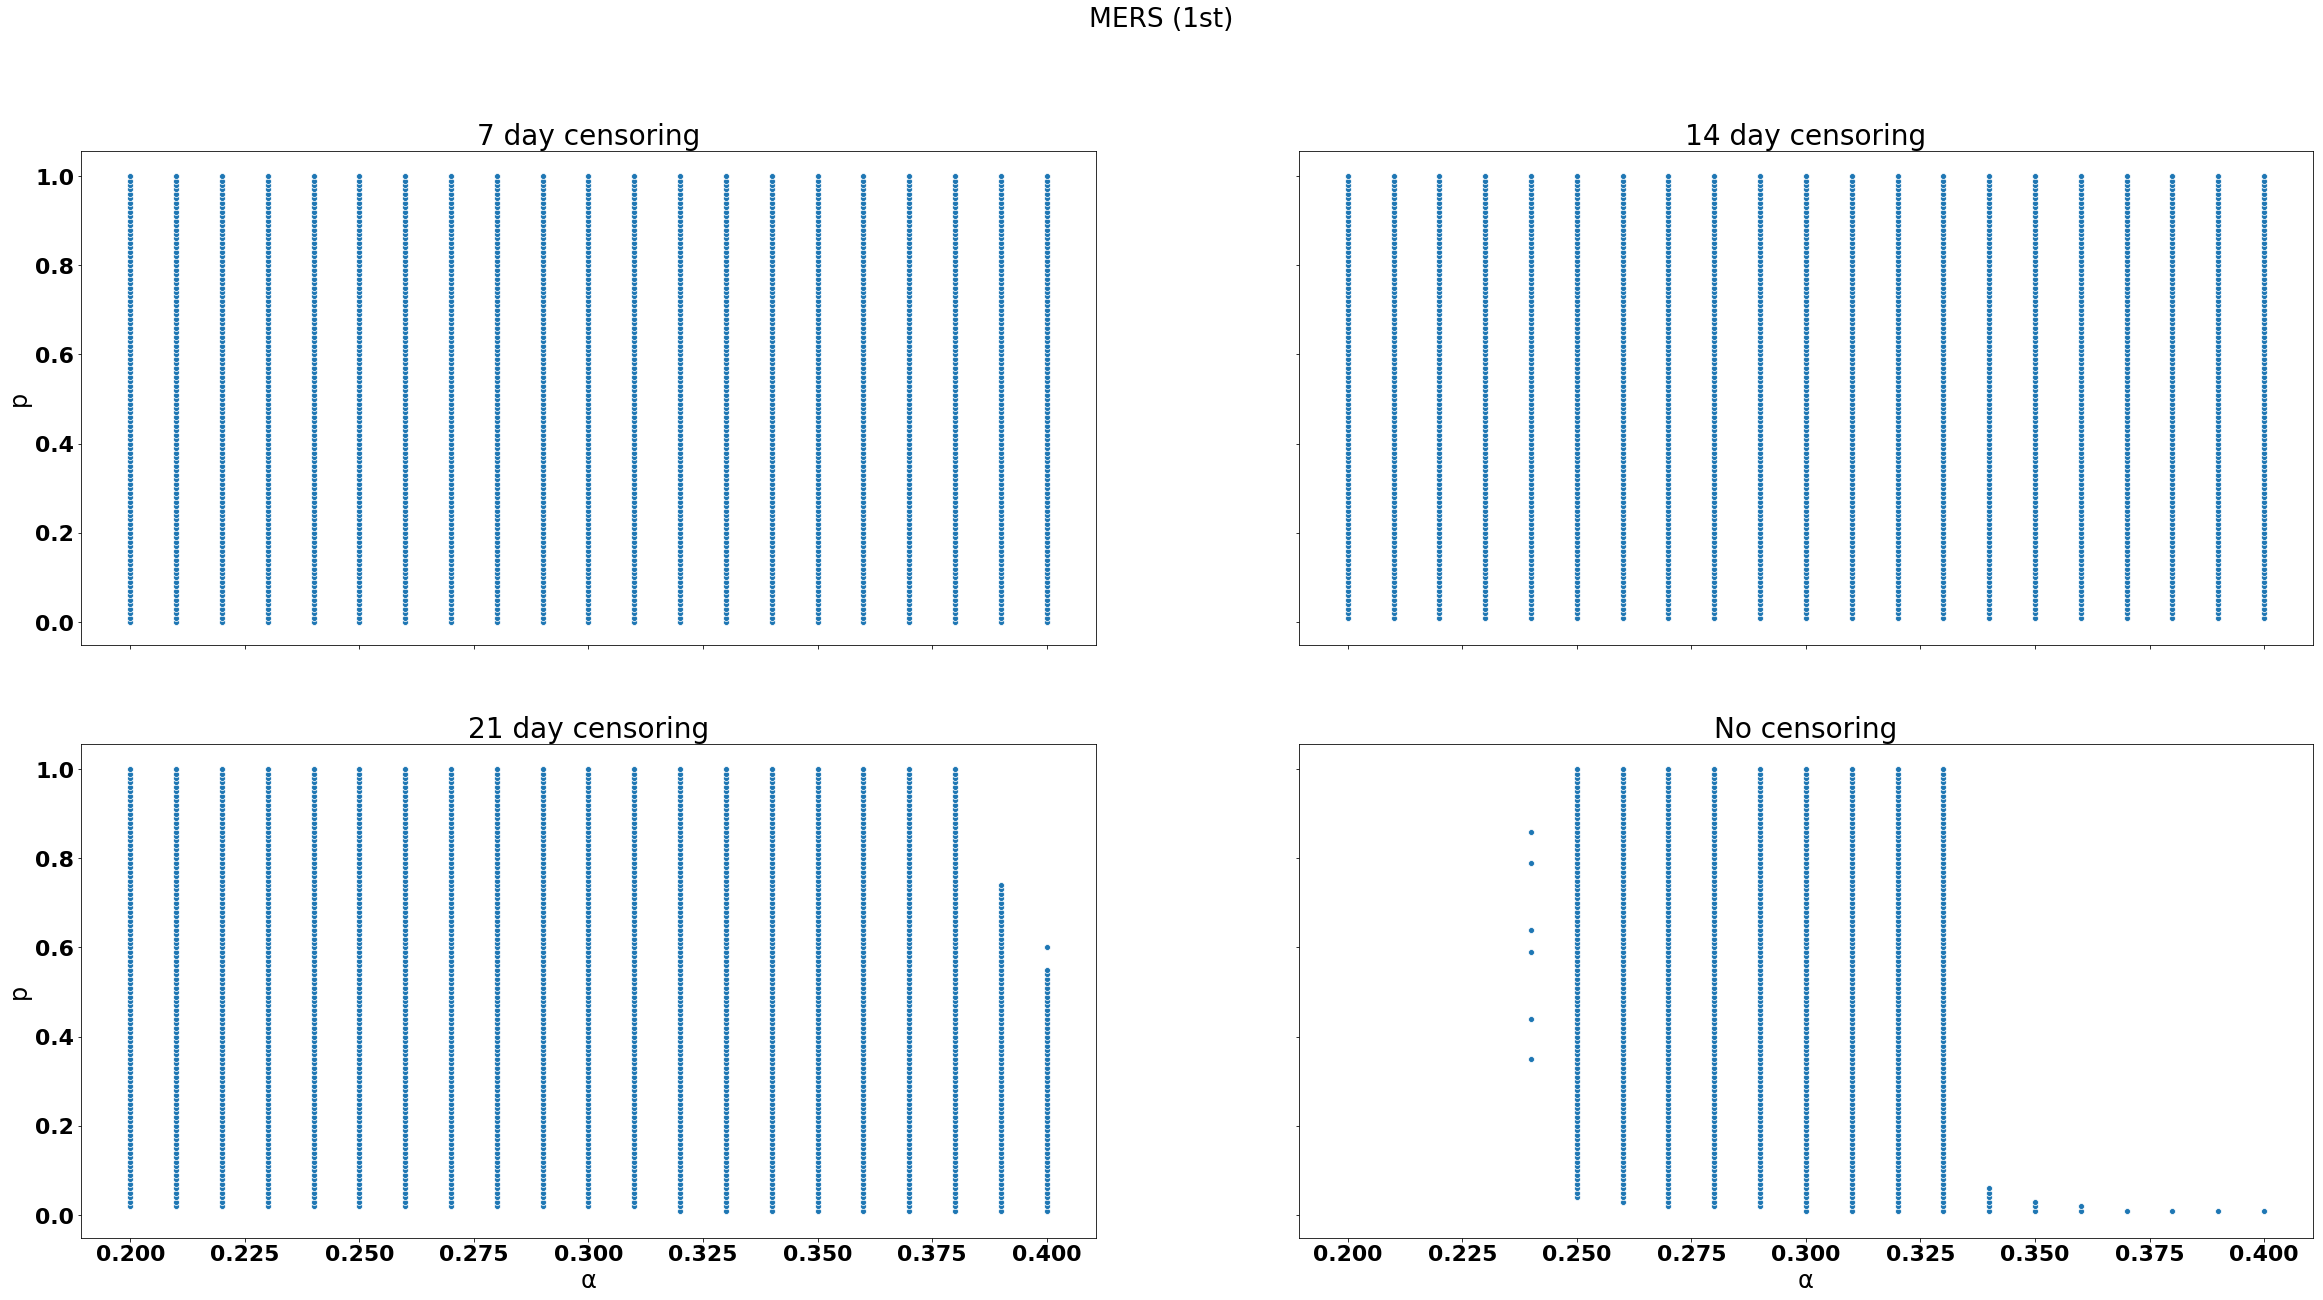

In [73]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

fig.suptitle("MERS (1st)")

ax[0][0].set_title("7 day censoring")
sns.scatterplot(x='α', y='p', data=mers_first_7d, ax=ax[0][0])

ax[0][1].set_title("14 day censoring")
sns.scatterplot(x='α', y='p', data=mers_first_14d, ax=ax[0][1])

ax[1][0].set_title("21 day censoring")
sns.scatterplot(x='α', y='p', data=mers_first_21d, ax=ax[1][0])

ax[1][1].set_title("No censoring")
sns.scatterplot(x='α', y='p', data=mers_first_402d, ax=ax[1][1])

plt.savefig("../plots/MERS_first_params.pdf")

In [63]:
mers_second_7d = pd.read_csv("../results/MERS_second_7d_90_params.csv")
mers_second_14d = pd.read_csv("../results/MERS_second_14d_90_params.csv")
mers_second_21d = pd.read_csv("../results/MERS_second_21d_90_params.csv")
mers_second_436d = pd.read_csv("../results/MERS_second_436d_90_params.csv")

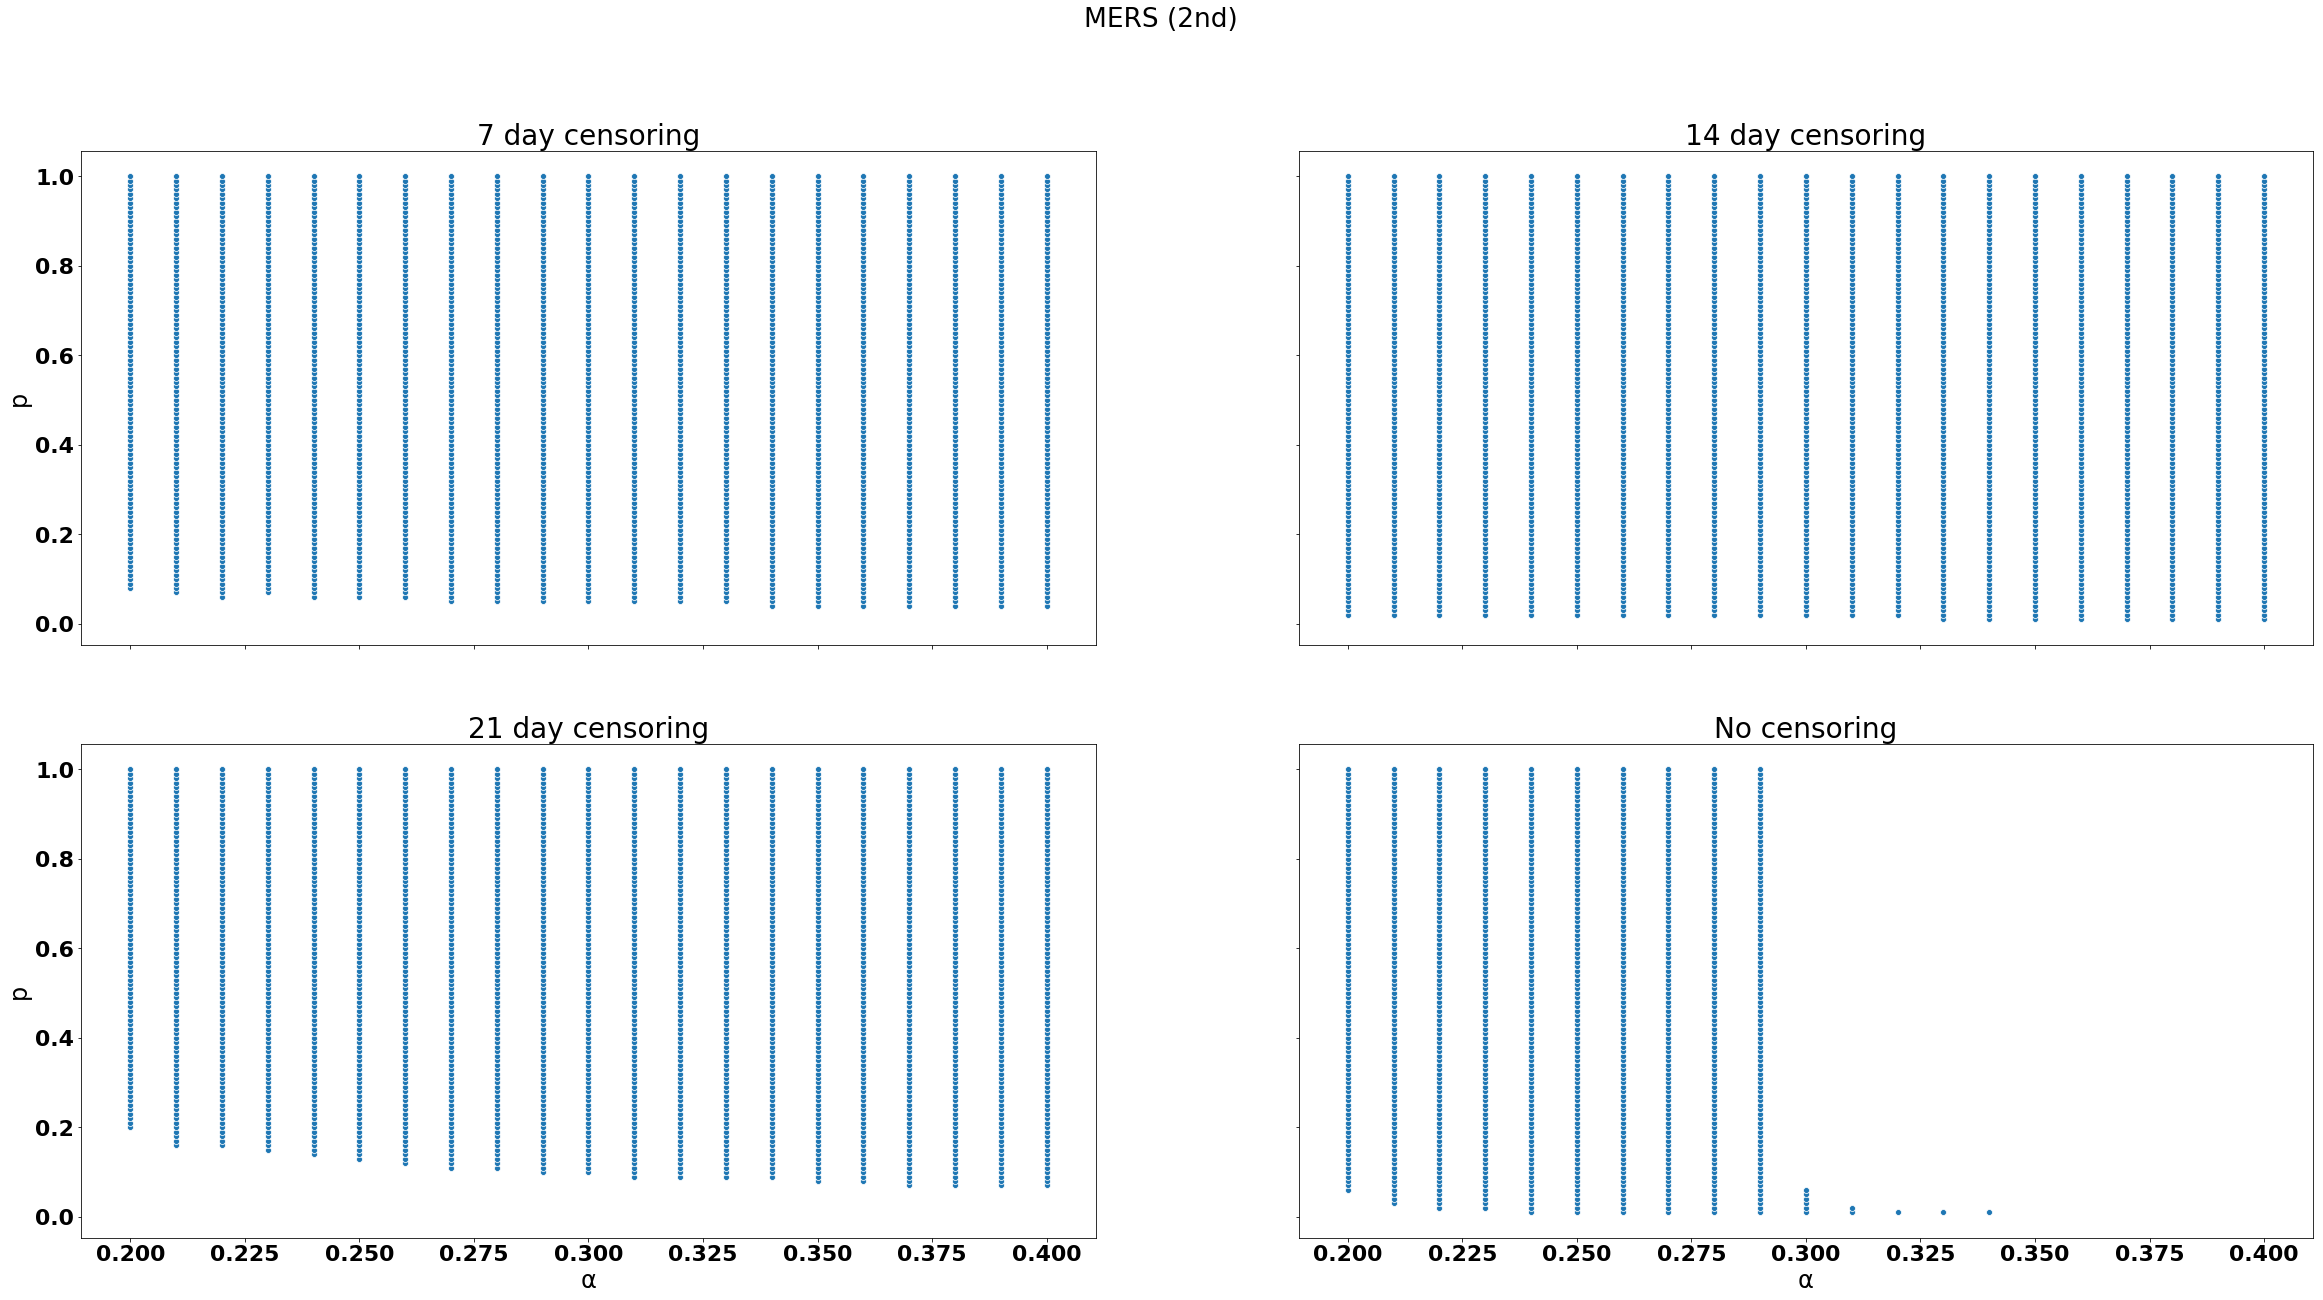

In [72]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

fig.suptitle("MERS (2nd)")

ax[0][0].set_title("7 day censoring")
sns.scatterplot(x='α', y='p', data=mers_second_7d, ax=ax[0][0])

ax[0][1].set_title("14 day censoring")
sns.scatterplot(x='α', y='p', data=mers_second_14d, ax=ax[0][1])

ax[1][0].set_title("21 day censoring")
sns.scatterplot(x='α', y='p', data=mers_second_21d, ax=ax[1][0])

ax[1][1].set_title("No censoring")
sns.scatterplot(x='α', y='p', data=mers_second_436d, ax=ax[1][1])

plt.savefig("../plots/MERS_second_params.pdf")

## Coronavirus

In [40]:
coronavirus_7d = pd.read_csv("../results/Coronavirus_7d_90_params.csv")
coronavirus_14d = pd.read_csv("../results/Coronavirus_14d_90_params.csv")
coronavirus_21d = pd.read_csv("../results/Coronavirus_21d_90_params.csv")
coronavirus_29d = pd.read_csv("../results/Coronavirus_29d_90_params.csv")

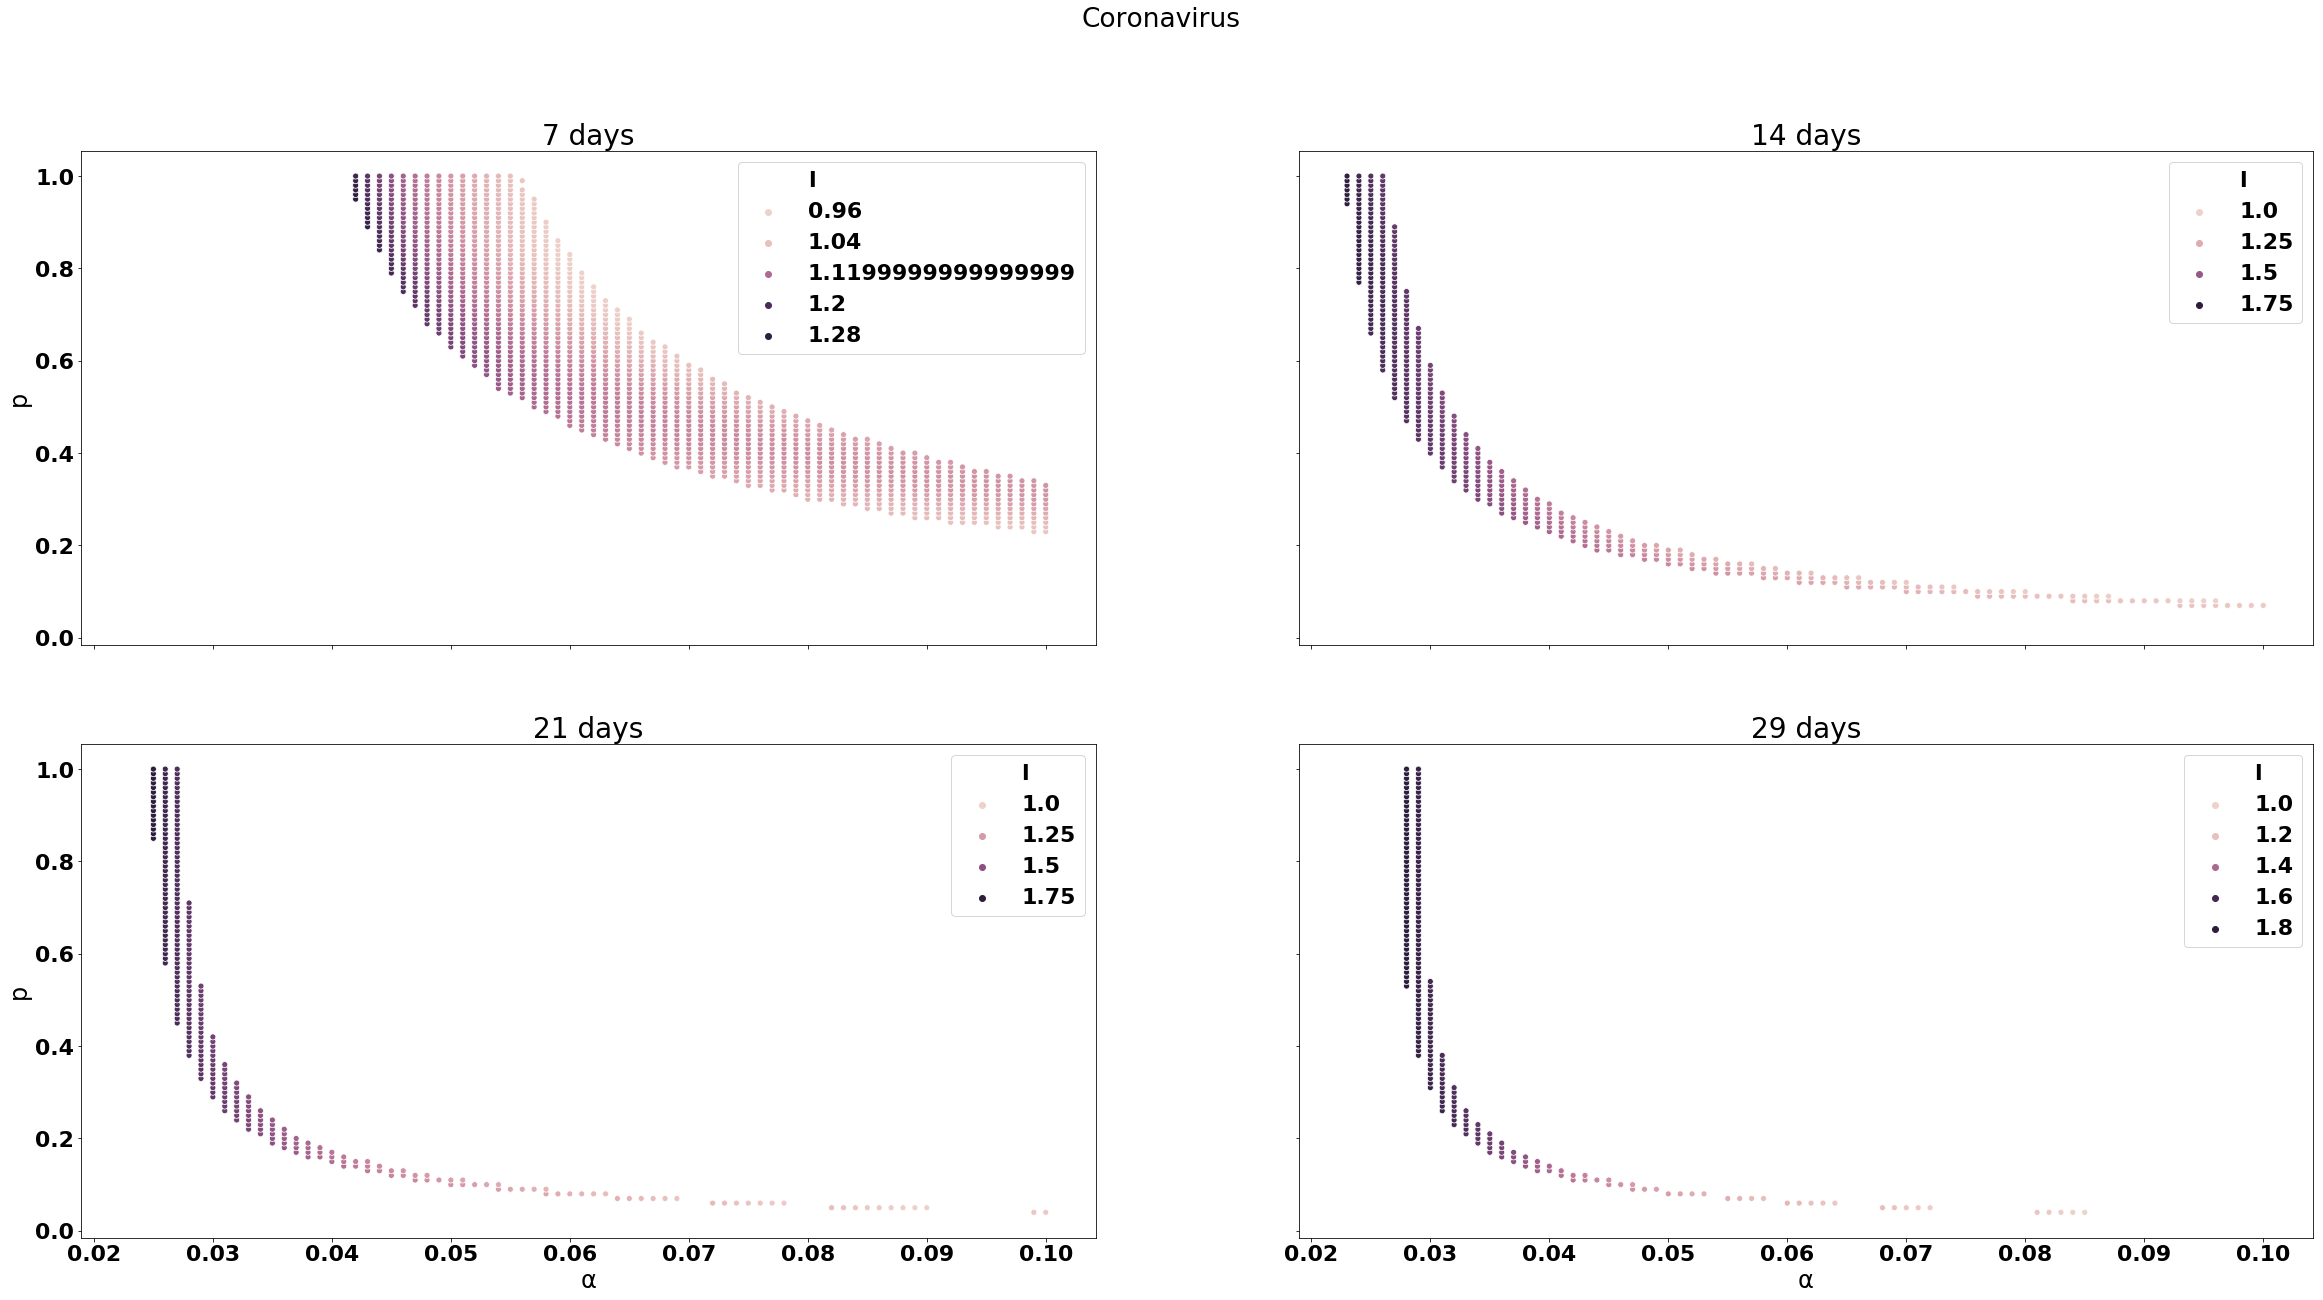

In [41]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

fig.suptitle("Coronavirus")

ax[0][0].set_title("7 days")
sns.scatterplot(x='α', y='p', hue='l', data=coronavirus_7d, ax=ax[0][0])

ax[0][1].set_title("14 days")
sns.scatterplot(x='α', y='p', hue='l', data=coronavirus_14d, ax=ax[0][1])

ax[1][0].set_title("21 days")
sns.scatterplot(x='α', y='p', hue='l', data=coronavirus_21d, ax=ax[1][0])

ax[1][1].set_title("29 days")
sns.scatterplot(x='α', y='p', hue='l', data=coronavirus_29d, ax=ax[1][1])

plt.savefig("../plots/Coronavirus_params.pdf")